In [0]:
from google.colab import drive
drive.mount('/content/drive')
root = "/content/drive/My Drive/Colab Notebooks/Hotdog or Not Hotdog/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code
Enter your authorization code:


In [2]:
!ls '/content/drive/My Drive/Colab Notebooks/dataset'
root = "/content/drive/My Drive/Colab Notebooks/"

aug data		    model2-v1.log  test data	  weights-v2.h5
Hotdog or Not Hotdog.ipynb  model3-v1.h5   train data
model2-v1.h5		    model3-v1.log  weights-v1.h5


In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, SGD, RMSprop 
from keras.losses import binary_crossentropy
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from keras import backend as K

In [0]:
from matplotlib import pyplot as plt
import numpy as np

In [0]:
def get_model(inshape, l2, dc):
    model = Sequential()
    
    model.add(Conv2D(16, (3,3), 
                     activation='relu', 
                     padding="same", 
                     input_shape=inshape, 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dc))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(32, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dc))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(128, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dc))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(256, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dc))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(256, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dc))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu', 
                    kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dc))
    model.add(Dense(512, activation='relu', 
                    kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dc))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [5]:
datagen = ImageDataGenerator()
train_generator = datagen.flow_from_directory(
    root+'dataset/aug data/',
    target_size=(256,256),
    color_mode='rgb',
    class_mode='binary',
    batch_size=64)     
test_generator = datagen.flow_from_directory(
    root+'dataset/test data/',
    target_size=(256,256),
    color_mode='rgb',
    class_mode='binary',
    batch_size=64)     

Found 995 images belonging to 2 classes.
Found 56 images belonging to 2 classes.


In [0]:
model1 = get_model((256, 256, 3), 0.0001, 0.2)

In [0]:
model1.compile(optimizer='rmsprop', loss=binary_crossentropy, metrics=['accuracy'])

In [13]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [14]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1783135746202285083
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11281989632
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11878082593668917478
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [0]:
history1 = model1.fit_generator(train_generator, 
                                epochs=50, 
                                verbose=1, 
                                use_multiprocessing=True, 
                                shuffle=True, 
                                workers=3, 
                                validation_data=test_generator, 
                                callbacks=[EarlyStopping(patience=5), 
                                           ModelCheckpoint(root+"model4-v1.h5", 
                                                           monitor="val_acc", 
                                                           save_best_only=True, 
                                                           save_weights_only=True, 
                                                           mode='max',), 
                                           CSVLogger(root+'model3-v1.log')])

In [0]:
model1.load_weights(root+"model4-v1.h5")

In [16]:
model1.evaluate_generator(test_generator)

[0.6082717776298523, 0.875]

Text(0.5,1,'Accuracy Curves')

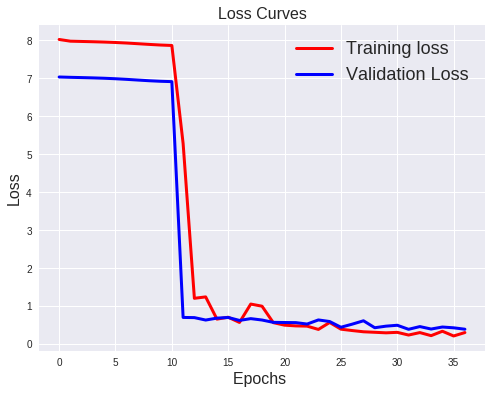

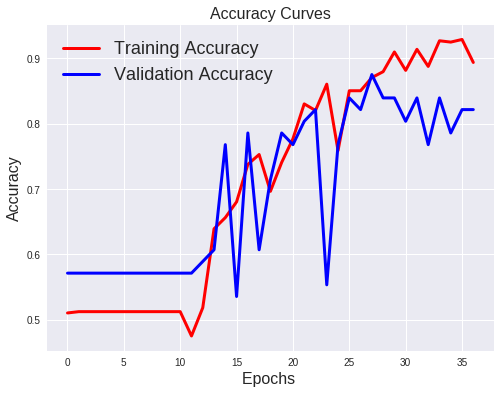

In [19]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history1.history['loss'],'r',linewidth=3.0)
plt.plot(history1.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history1.history['acc'],'r',linewidth=3.0)
plt.plot(history1.history['val_acc'], 'b', linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [0]:
model2 = get_model((256, 256, 3), 0.0003, 0.22)

In [0]:
model2.compile(optimizer=Adam(lr=0.0001, 
                              beta_1=0.9, 
                              beta_2=0.999,
                              decay=0.01), 
               loss=binary_crossentropy, 
               metrics=['accuracy'])

In [0]:
history2 = model2.fit_generator(train_generator, 
                                epochs=50, 
                                verbose=1, 
                                use_multiprocessing=True, 
                                shuffle=True, 
                                workers=3, 
                                validation_data=test_generator, 
                                callbacks=[EarlyStopping(monitor="val_loss",
                                                         mode='min',
                                                         verbose=1,
                                                         patience=15), 
                                           ModelCheckpoint(root+"model4-v2.h5", 
                                                           monitor="val_loss", 
                                                           verbose=1,
                                                           save_best_only=True, 
                                                           save_weights_only=True, 
                                                           mode='min',), 
                                           CSVLogger(root+'model4-v2.log')])

In [0]:
def get_model_2(inshape, l2):
    model = Sequential()
  
    model.add(Conv2D(64, (3,3), 
                     activation='relu', 
                     padding="same", 
                     input_shape=(256, 256, 3))
    model.add(Conv2D(32, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
#     model.add(Dropout(dc))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(64, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Conv2D(64, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
#     model.add(Dropout(dc))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(128, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Conv2D(128, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Conv2D(128, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
#     model.add(Dropout(dc))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(256, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Conv2D(256, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(512, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Conv2D(512, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
#     model.add(Dropout(dc))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Flatten())
    model.add(Dense(1024, activation='relu', 
                    kernel_regularizer=regularizers.l2(l2)))
#     model.add(Dropout(dc))
    model.add(Dense(1024, activation='relu', 
                    kernel_regularizer=regularizers.l2(l2)))
#     model.add(Dropout(dc))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [0]:
model3 = get_model_2((256,256,3), 0.001, 0.2)
model3.compile(optimizer=SGD(lr=0.0001,
                             momentum=0.01,
                             decay=1e-9), 
               loss='binary_crossentropy', 
               metrics=['accuracy'])

In [0]:
model3.load_weights(root+"model2-v1.h5")
history3 = model3.fit_generator(train_generator, 
                     epochs=100, 
                     verbose=1, 
                     use_multiprocessing=True, 
                     shuffle=True, 
                     workers=3, 
                     validation_data=test_generator, 
                     callbacks=[EarlyStopping(monitor="val_loss",
                                              mode='min',
                                              patience=15), 
                                ModelCheckpoint(root+"model2-v1.h5", 
                                                monitor="val_acc",
                                                save_best_only=True, 
                                                save_weights_only=True, 
                                                mode='max')])

In [10]:
model3.load_weights(root+"model2-v1.h5")
model3.evaluate_generator(train_generator)

[4.99225808867258, 0.9135678393157882]

In [11]:
model3.evaluate_generator(test_generator)

[5.122373104095459, 0.9107142686843872]

Text(0.5,1,'Accuracy Curves')

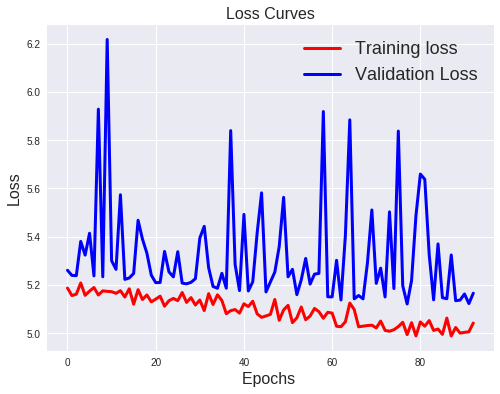

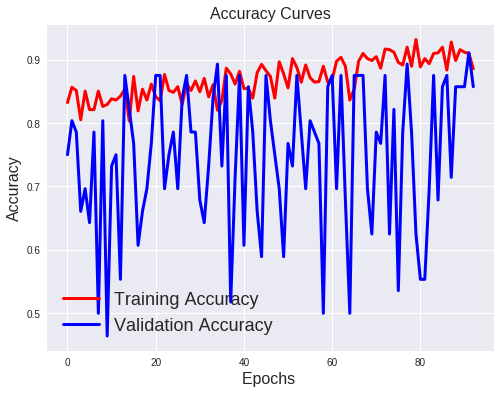

In [19]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history3.history['loss'],'r',linewidth=3.0)
plt.plot(history3.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history3.history['acc'],'r',linewidth=3.0)
plt.plot(history3.history['val_acc'], 'b', linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [0]:
X,Y = test_generator.next()

In [0]:
y_pred = model3.predict_classes(X)

In [104]:
type(y_pred)

numpy.ndarray

In [76]:
Y.reshape(y_pred.shape).astype(int)[11]

array([0])

In [0]:
total_positives = np.sum(y_pred)
false_positives = np.sum(y_pred.any() == 1 and y_pred != Y.reshape(y_pred.shape).astype(int))
true_positives = total_positives - false_positives
actual_positives = np.sum(Y)
precision = true_positives/(total_positives)
recall = true_positives/actual_positives
f1 = (2*precision*recall)/(precision+recall)

In [88]:
f1

0.8627450980392156

In [0]:
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
model4 = get_model_2((256, 256, 3), 0.003)

In [0]:
model4.compile(optimizer=SGD(lr=0.0003,
                             momentum=0.9),
               loss='binary_crossentropy',
               metrics=['accuracy', f1_score])

In [116]:
history4 = model4.fit_generator(train_generator, 
                                epochs=100, 
                                verbose=1, 
                                use_multiprocessing=True, 
                                shuffle=True, 
                                workers=3, 
                                validation_data=test_generator, 
                                callbacks=[EarlyStopping(monitor="val_loss",
                                                         mode='min',
                                                         patience=15), 
                                           ModelCheckpoint(root+"model2-v2.h5", 
                                                           monitor="val_f1_score",
                                                           save_best_only=True, 
                                                           save_weights_only=True, 
                                                           mode='max')])

Epoch 1/100
16/16 [==============================] - 18s 1s/step - loss: 14.8523 - acc: 0.7524 - f1_score: 0.7447 - val_loss: 14.8441 - val_acc: 0.7321 - val_f1_score: 0.7541
Epoch 2/100
16/16 [==============================] - 16s 1s/step - loss: 14.8777 - acc: 0.6680 - f1_score: 0.5669 - val_loss: 14.8765 - val_acc: 0.6964 - val_f1_score: 0.7302
Epoch 3/100
16/16 [==============================] - 16s 1s/step - loss: 14.8156 - acc: 0.7402 - f1_score: 0.7356 - val_loss: 14.8629 - val_acc: 0.6786 - val_f1_score: 0.7187
Epoch 4/100
16/16 [==============================] - 16s 1s/step - loss: 14.7720 - acc: 0.7493 - f1_score: 0.7469 - val_loss: 14.7555 - val_acc: 0.7857 - val_f1_score: 0.7931
Epoch 5/100
16/16 [==============================] - 16s 1s/step - loss: 14.7337 - acc: 0.7854 - f1_score: 0.7439 - val_loss: 14.7164 - val_acc: 0.8036 - val_f1_score: 0.7556
Epoch 6/100
16/16 [==============================] - 16s 1s/step - loss: 14.7580 - acc: 0.7541 - f1_score: 0.7360 - val_loss:

In [121]:
model4.load_weights(root+"model2-v2.h5")
model4.evaluate_generator(test_generator)

[14.416342735290527, 0.9107142686843872, 0.8936169743537903]

Text(0.5,1,'Accuracy Curves')

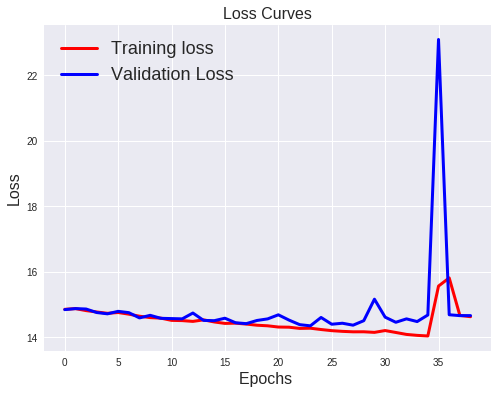

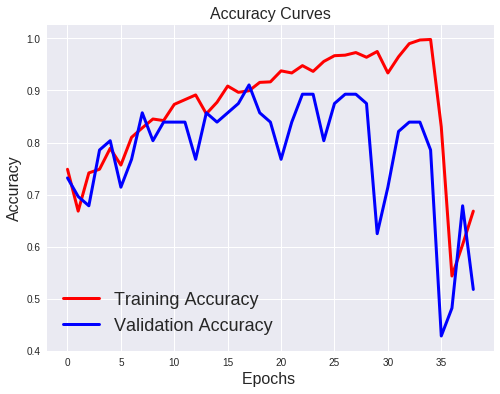

In [119]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history4.history['loss'],'r',linewidth=3.0)
plt.plot(history4.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history4.history['acc'],'r',linewidth=3.0)
plt.plot(history4.history['val_acc'], 'b', linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [174]:
X_Test, Y_Test = test_generator.next()
model4.evaluate_generator(test_generator)

[14.416342735290527, 0.9107142686843872, 0.8936169743537903]

In [0]:
def f1(y_true, y_pred):
  total_positives = np.sum(y_pred)
  actual_positives = np.sum(y_true)
  true_positives = np.sum(y_true.reshape(y_pred.shape)*y_pred)
  precision = true_positives/(total_positives+K.epsilon())
  recall = true_positives/(actual_positives+K.epsilon())
  f1_score = (2*precision*recall)/(precision + recall + K.epsilon())
  return f1_score

In [199]:
y_p = model4.predict_classes(X_Test)
f1(Y_Test.astype(int), y_p.astype(int))

0.8936169674966076

In [201]:
y_avg = np.around((.7*model3.predict(X_Test) + .3*model4.predict(X_Test)))
print("f1 score of averaged model: " + str(f1(Y_Test.astype(int), y_avg.astype(int))))
print("Accuracy of averaged model: " + str(np.sum(y_avg == Y_Test.reshape(y_avg.shape))/y_avg.shape[0]))

f1 score of averaged model: 0.9387754563931721
Accuracy of averaged model: 0.9464285714285714


In [1]:
def is_hotdog(image):
    

SyntaxError: ignored